In [ ]:
!pip install yfinance

In [ ]:
#Import Modules
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
MTDL = yf.Ticker('MTDL.jk')

In [ ]:
hist = MTDL.history(start='2016-11-1', end='2021-11-1')

In [ ]:
#Kita ambil hanya kolom harga penutupan
data = hist.filter(['Close'])

In [ ]:
#kita ambil hanya nilainya saja
dataset = data.values

In [ ]:
#kita akan memisahkan data training dengan data testing sebanyak 80 : 20
training_data_len = math.ceil(len(dataset) * .8)

In [ ]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  #check for a bunch of x_train and y _train
  if i <=60:
    print(x_train)
    print()
    print(y_train)
    print()

[array([0.02682835, 0.02682835, 0.02682835, 0.02682835, 0.02542145,
       0.02401456, 0.02401456, 0.02120077, 0.02120077, 0.0141663 ,
       0.01838698, 0.02120077, 0.02260766, 0.02120077, 0.02120077,
       0.02401456, 0.01979388, 0.01979388, 0.0155732 , 0.01838698,
       0.01838698, 0.01698007, 0.01838698, 0.01838698, 0.01838698,
       0.0155732 , 0.0155732 , 0.0141663 , 0.0141663 , 0.01275939,
       0.0155732 , 0.0155732 , 0.0155732 , 0.0155732 , 0.00994562,
       0.00994562, 0.01135253, 0.00994562, 0.00994562, 0.01275939,
       0.01275939, 0.01275939, 0.01275939, 0.01135253, 0.00994562,
       0.00994562, 0.01275939, 0.01135253, 0.01135253, 0.01135253,
       0.00994562, 0.00994562, 0.01135253, 0.00994562, 0.00994562,
       0.01275939, 0.00994562, 0.00994562, 0.00994562, 0.00994562])]

[0.009945619185420224]



In [ ]:
#mengubah data menjadi format numpy array
X_train, Y_train = np.array(x_train), np.array(y_train)

In [ ]:
#mengubah dimensi data train menjadi 3 dimensi karena LSTM butuh data berdimensi 3
# [number of samples, number of time steps, and number of features]
X_train = np.reshape(X_train, (
    X_train.shape[0],
    X_train.shape[1],
    1
))

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [ ]:
model.fit(X_train,Y_train,epochs=20,batch_size=2)

Epoch 1/20
474/474 [==============================] - 29s 43ms/step - loss: 0.0019
Epoch 2/20
474/474 [==============================] - 20s 43ms/step - loss: 9.4503e-04
Epoch 3/20
474/474 [==============================] - 20s 43ms/step - loss: 7.1252e-04
Epoch 4/20
474/474 [==============================] - 20s 43ms/step - loss: 7.7787e-04
Epoch 5/20
474/474 [==============================] - 20s 43ms/step - loss: 7.5283e-04
Epoch 6/20
474/474 [==============================] - 20s 42ms/step - loss: 6.2752e-04
Epoch 7/20
474/474 [==============================] - 20s 42ms/step - loss: 5.5989e-04
Epoch 8/20
474/474 [==============================] - 20s 42ms/step - loss: 6.5480e-04
Epoch 9/20
474/474 [==============================] - 20s 43ms/step - loss: 6.1024e-04
Epoch 10/20
474/474 [==============================] - 20s 43ms/step - loss: 5.6900e-04
Epoch 11/20
474/474 [==============================] - 20s 43ms/step - loss: 4.8460e-04
Epoch 12/20
474/474 [========================

In [ ]:
test_data = scaled_data[training_data_len-60:, :]

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#ubah x_test menjadi numpy array
x_test = np.array(x_test)

In [ ]:
#mengubah x test menjadi 3 dimensi
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1],
                     1))

In [ ]:
predictions = model.predict(x_test)

# mengembalikan lagi ke angka awal (tidak di scaling)
predictions = scaler.inverse_transform(predictions)

In [ ]:
np.any(np.isnan(predictions))

False

In [ ]:
np.any(np.isnan(y_test))

False

In [ ]:
from sklearn.metrics import mean_squared_error as mse

rmse = np.sqrt(mse(y_test, predictions))

In [ ]:
print(rmse)

109.01990327763384


In [ ]:
#membuat dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


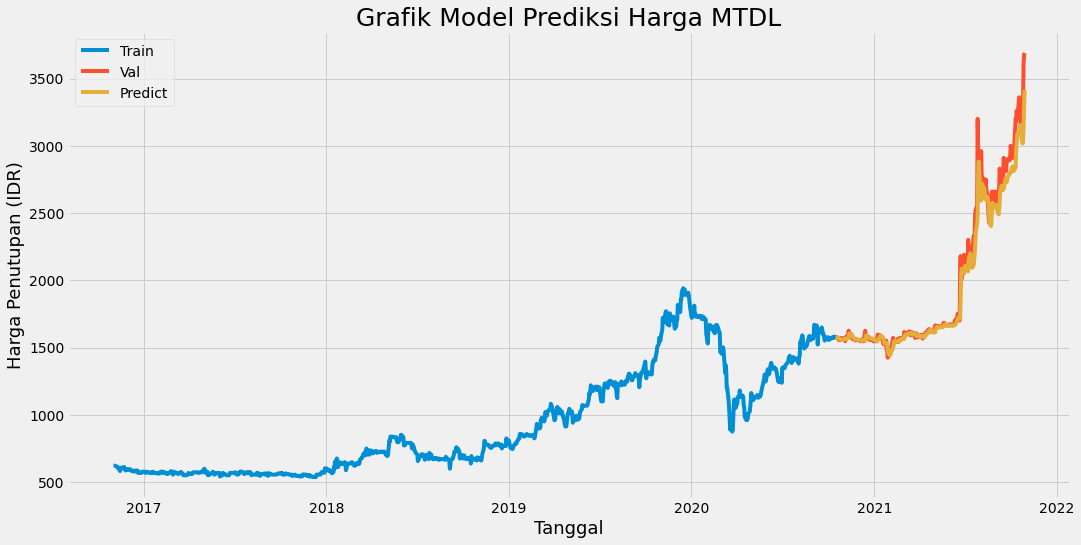

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Grafik Model Prediksi Harga MTDL', fontsize=25)
plt.xlabel('Tanggal',fontsize=18)
plt.ylabel('Harga Penutupan (IDR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

In [ ]:
x = []
y = []

for i in range(60, len(scaled_data)):
  x.append(scaled_data[i-60:i, 0])
  y.append(scaled_data[i, 0])
  #check for a bunch of x_train and y _train
  if i <=60:
    print(x)
    print()
    print(y)
    print()
	
#mengubah data menjadi format numpy array
x_train, y_train = np.array(x), np.array(y)

#mengubah dimensi data train menjadi 3 dimensi karena LSTM butuh data berdimensi 3
# [number of samples, number of time steps, and number of features]
x_train = np.reshape(x_train, (
    x_train.shape[0],
    x_train.shape[1],
    1
))

[array([0.02682835, 0.02682835, 0.02682835, 0.02682835, 0.02542145,
       0.02401456, 0.02401456, 0.02120077, 0.02120077, 0.0141663 ,
       0.01838698, 0.02120077, 0.02260766, 0.02120077, 0.02120077,
       0.02401456, 0.01979388, 0.01979388, 0.0155732 , 0.01838698,
       0.01838698, 0.01698007, 0.01838698, 0.01838698, 0.01838698,
       0.0155732 , 0.0155732 , 0.0141663 , 0.0141663 , 0.01275939,
       0.0155732 , 0.0155732 , 0.0155732 , 0.0155732 , 0.00994562,
       0.00994562, 0.01135253, 0.00994562, 0.00994562, 0.01275939,
       0.01275939, 0.01275939, 0.01275939, 0.01135253, 0.00994562,
       0.00994562, 0.01275939, 0.01135253, 0.01135253, 0.01135253,
       0.00994562, 0.00994562, 0.01135253, 0.00994562, 0.00994562,
       0.01275939, 0.00994562, 0.00994562, 0.00994562, 0.00994562])]

[0.009945619185420224]



In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=2)

Epoch 1/100
600/600 [==============================] - 38s 54ms/step - loss: 0.0045
Epoch 2/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0024
Epoch 3/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0029
Epoch 4/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0019
Epoch 5/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0023
Epoch 6/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0021
Epoch 7/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0018
Epoch 8/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0016
Epoch 9/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0023
Epoch 10/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0015
Epoch 11/100
600/600 [==============================] - 32s 54ms/step - loss: 0.0011
Epoch 12/100
600/600 [==============================] - 32s 54ms/step - lo

In [ ]:
new_df = data.copy()
last_120_days = new_df[-60:].values
last_120_days_scaled = scaler.transform(last_120_days)
x_test = []
x_test.append(last_120_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                    x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price_real = scaler.inverse_transform(pred_price)
print(pred_price_real)

[[3570.6602]]


In [ ]:
values = new_df.values
forecast = []
nilai = list(scaler.transform(values))

for i in range(14):
  row = np.array(nilai[-60:])
  row = np.reshape(row, (row.shape[0], row.shape[1], 1))
  pred_price = model.predict(row)
  nilai.append(pred_price[0])
  forecast.append(scaler.inverse_transform(pred_price)[0])
  # print(scaler.inverse_transform(pred_price))
print('Selesai')


Selesai


In [ ]:
hasil_forecast = []

for i in range(14):
  hasil_forecast.append(forecast[i][0])

In [ ]:
rng = pd.date_range('2021-11-1', periods=14, freq='B')
fc = pd.DataFrame({'date': rng, 'forecast':hasil_forecast})

In [ ]:
fc = fc.set_index('date')

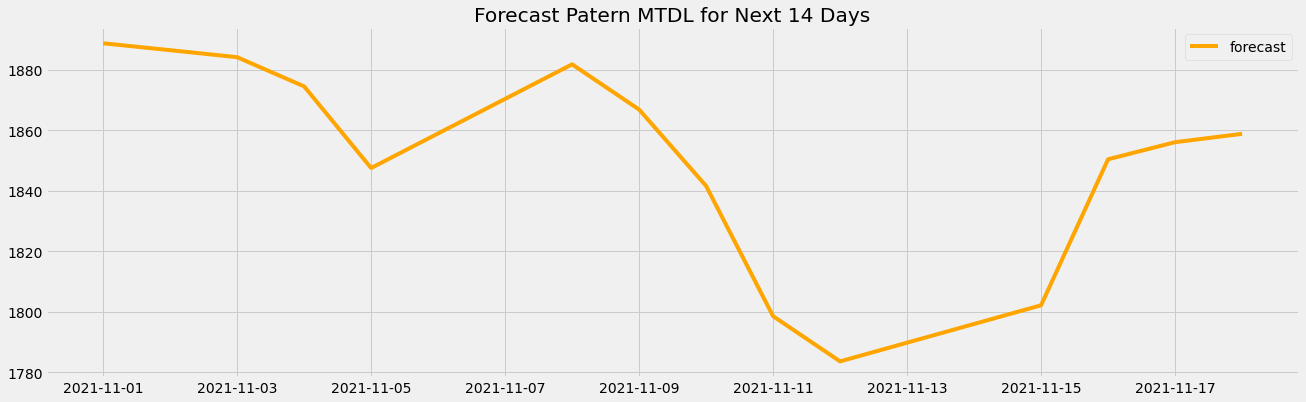

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Forecast Patern MTDL for Next 14 Days')
plt.plot(fc, label = 'forecast', c='orange')
plt.legend()

In [ ]:
fc

,forecast
date,
2021-11-01,1888.842407
2021-11-02,1886.560913
2021-11-03,1884.242432
2021-11-04,1874.584595
2021-11-05,1847.586060
2021-11-08,1881.885986
2021-11-09,1866.924927
2021-11-10,1841.666382
2021-11-11,1798.583496
